# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nicky Valentino (m007b4ky3360)
- **Email:** nickyv.valentino@gmail.com
- **ID Dicoding:** nicky_valentino

## Menentukan Pertanyaan Bisnis

- How do weather affect the total number of bike rentals?
- How does the number of bike rentals differ between registered and casual users on weekdays and weekends?

## Import Semua Packages/Library yang Digunakan

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install gdown

from google.colab import drive
drive.mount('/content/drive')

!gdown --id 1Wc0J5Rm-OlpW6SfckqMPsJO1RqWNc1CU
!gdown --id 1P23cvP7k2d7B6XzI7Rr9-1Ev5R5MuyRW

Mounted at /content/drive
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Wc0J5Rm-OlpW6SfckqMPsJO1RqWNc1CU
To: /content/day.csv
100% 57.6k/57.6k [00:00<00:00, 5.11MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1P23cvP7k2d7B6XzI7Rr9-1Ev5R5MuyRW
To: /content/hour.csv
100% 1.16M/1.16M [00:00<00:00, 17.1MB/s]


## Data Wrangling

### Gathering Data

In [90]:
df_day = pd.read_csv('/content/day.csv')
df_hour = pd.read_csv('/content/hour.csv')

print(df_day.head())
print(df_hour.head())

print("\n")

print("Daily basis bike-sharing dataset shape:", df_day.shape)
print("Hourly basis bike-sharing dataset shape:", df_hour.shape)

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

In gather data section, I am simply gathering the data. I have two variables: `df_day` for daily basis bike-sharing dataset and `df_hour` for hourly basis bike-sharing dataset. And I printed the first 5 rows of the dataset. I displayed the shape of each bike-sharing dataset. Daily basis bike-sharing dataset has 731 rows and 16 columns and hourly basis bike-sharing dataset has 17379 rows and 17 columns.

### Assessing Data

In [91]:
print(df_day.info(), "\n")
print(df_hour.info(), "\n")

print(df_day.isnull().sum(), "\n")
print(df_hour.isnull().sum(), "\n")

print(df_day.describe(), "\n")
print(df_hour.describe(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data colum

In this step, I tried to assess whether there were any missing values in both datasets. It turns out that the number of rows and columns matches, so it can be said that there are no missing values in these datasets. However, this data is still somewhat difficult to read because the values are still quite confusing. In the next stage, I will try to clean this dataset.

### Cleaning Data

In [92]:
df_day['yr'] = df_day['yr'].map({0: 2011, 1: 2012})
df_hour['yr'] = df_hour['yr'].map({0: 2011, 1: 2012})

df_day['season'] = df_day['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df_hour['season'] = df_hour['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

df_day['weekday'] = df_day['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df_hour['weekday'] = df_hour['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

df_day['holiday'] = df_day['holiday'].map({0: 'No', 1: 'Yes'})
df_hour['holiday'] = df_hour['holiday'].map({0: 'No', 1: 'Yes'})

df_day['workingday'] = df_day['workingday'].map({0: 'No', 1: 'Yes'})
df_hour['workingday'] = df_hour['workingday'].map({0: 'No', 1: 'Yes'})

df_day['temp'] = df_day['temp'] * 41
df_hour['temp'] = df_hour['temp'] * 41

df_day['atemp'] = df_day['atemp'] * 50
df_hour['atemp'] = df_hour['atemp'] * 50

df_day['hum'] = df_day['hum'] * 100
df_hour['hum'] = df_hour['hum'] * 100

df_day['windspeed'] = df_day['windspeed'] * 67
df_hour['windspeed'] = df_hour['windspeed'] * 67

print(df_day.describe(), "\n")
print(df_hour.describe())


          instant           yr        mnth  weathersit        temp  \
count  731.000000   731.000000  731.000000  731.000000  731.000000   
mean   366.000000  2011.500684    6.519836    1.395349   20.310776   
std    211.165812     0.500342    3.451913    0.544894    7.505091   
min      1.000000  2011.000000    1.000000    1.000000    2.424346   
25%    183.500000  2011.000000    4.000000    1.000000   13.820424   
50%    366.000000  2012.000000    7.000000    1.000000   20.431653   
75%    548.500000  2012.000000   10.000000    2.000000   26.872076   
max    731.000000  2012.000000   12.000000    3.000000   35.328347   

            atemp         hum   windspeed       casual   registered  \
count  731.000000  731.000000  731.000000   731.000000   731.000000   
mean    23.717699   62.789406   12.762576   848.176471  3656.172367   
std      8.148059   14.242910    5.192357   686.622488  1560.256377   
min      3.953480    0.000000    1.500244     2.000000    20.000000   
25%     16.892

In this step, I tried to clean the data by converting some values into a more readable format. For example, I changed the year, which was previously represented by 0 or 1, into a more understandable year format. I also denormalized data that was previously normalized. For instance, I denormalized the temperature data that was originally in a normalized format.

## Exploratory Data Analysis (EDA)

### Explore ...

In [93]:
day_weather_agg = df_day.groupby(by="weathersit").agg({
    "cnt": ["sum", "mean", "min", "max", "std"]
})

print(day_weather_agg)

hour_weather_agg = df_hour.groupby(by="weathersit").agg({
    "cnt": ["sum", "mean", "min", "max", "std"]
})

print(hour_weather_agg)

                cnt                                     
                sum         mean  min   max          std
weathersit                                              
1           2257952  4876.786177  431  8714  1879.483989
2            996858  4035.862348  605  8362  1809.109918
3             37869  1803.285714   22  4639  1240.284449
                cnt                                 
                sum        mean min  max         std
weathersit                                          
1           2338173  204.869272   1  977  189.487773
2            795952  175.165493   1  957  165.431589
3            158331  111.579281   1  891  133.781045
4               223   74.333333  23  164   77.925178


**Insight (Question 1: How do weather affect the total number of bike rentals?):**
- Better weather (weathersit = 1) leads to significantly more bike rentals. People tend to rent more bikes during clear, partly cloudy, or few clouds conditions.
- Worse weather (weathersit = 2, 3, 4) shows a clear decline in bike rentals, with a significant drop in very poor weather conditions like heavy rain, snow, or fog.
- Both daily and hourly data confirm this pattern, with clearer weather amplifying existing rental trends and bad weather reducing rentals across the board.

In [94]:
# Create a new column 'day_type' to categorize days as 'Weekday' or 'Weekend'
df_day['day_type'] = df_day['weekday'].apply(lambda x: 'Weekend' if x in ["Sunday", "Saturday"] else 'Weekday')  # 0: Sunday, 6: Saturday

# Group by 'day_type' (Weekday/Weekend) and aggregate rentals for registered and casual users
day_weekend_weekday_rentals = df_day.groupby(by="day_type", as_index=False).agg({
    "registered": "sum",  # Total rentals by registered users
    "casual": "sum"       # Total rentals by casual users
})

# Display the grouped data
print(day_weekend_weekday_rentals)

  day_type  registered  casual
0  Weekday     2045201  325644
1  Weekend      627461  294373


**Insight (Question 2: How does the number of bike rentals differ between registered and casual users on weekdays and weekends?):**
- Registered users prefer weekdays. The number of registered users renting bikes drops significantly on weekends (from over 2 million to around 627,000 rentals).
- Casual users are more balanced between weekdays and weekends. Casual user numbers drop on weekends as well, but the reduction isn’t as significant as with registered users (weekdays: 325,644 rentals vs. weekends: 294,373 rentals).

## Visualization & Explanatory Analysis

### Pertanyaan 1 - How do weather affect the total number of bike rentals?:

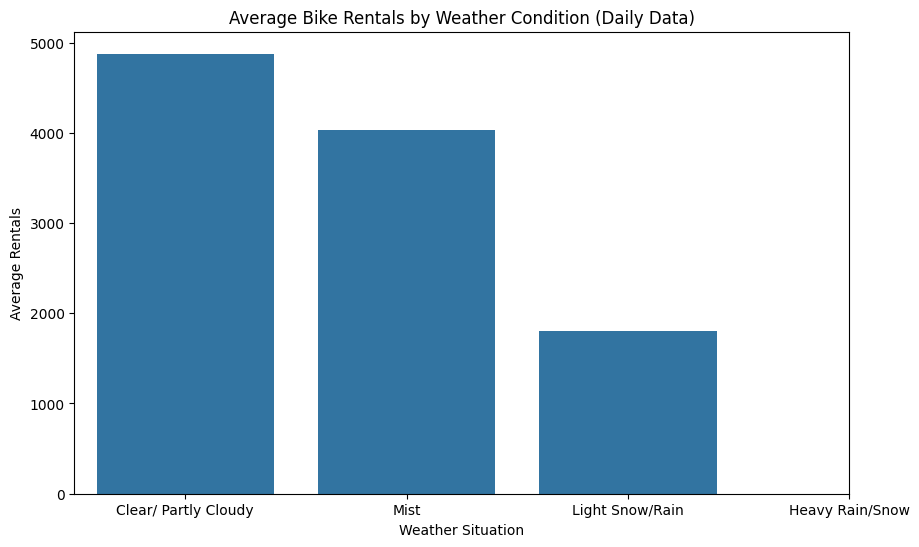

In [95]:
plt.figure(figsize=(10, 6))
sns.barplot(x=day_weather_agg.index, y=day_weather_agg['cnt']['mean'])
plt.title('Average Bike Rentals by Weather Condition (Daily Data)')
plt.xlabel('Weather Situation')
plt.ylabel('Average Rentals')
plt.xticks([0, 1, 2, 3], ['Clear/ Partly Cloudy', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.show()

In [96]:
df_rfm = df_day.groupby(by="weathersit", as_index=False).agg({
    "dteday": "max",
    "cnt": ["count", "sum"]
})

df_rfm.columns = ["weathersit", "max_rental_date", "frequency", "monetary"]

df_rfm["max_rental_date"] = pd.to_datetime(df_rfm["max_rental_date"]).dt.date
recent_date = df_day["dteday"].max()
recent_date = pd.to_datetime(recent_date).date()

df_rfm["recency"] = df_rfm["max_rental_date"].apply(lambda x: (recent_date - x).days)

df_rfm.drop("max_rental_date", axis=1, inplace=True)

print("daily basis:")
print(df_rfm.head())

daily basis:
   weathersit  frequency  monetary  recency
0           1        463   2257952        1
1           2        247    996858        0
2           3         21     37869        5


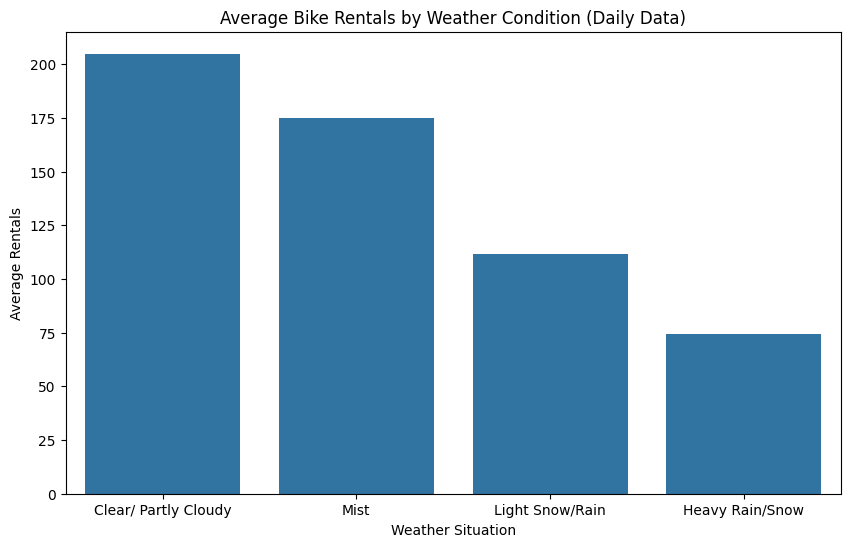

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(x=hour_weather_agg.index, y=hour_weather_agg['cnt']['mean'])
plt.title('Average Bike Rentals by Weather Condition (Daily Data)')
plt.xlabel('Weather Situation')
plt.ylabel('Average Rentals')
plt.xticks([0, 1, 2, 3], ['Clear/ Partly Cloudy', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.show()

In [98]:
df_rfm = df_hour.groupby(by="weathersit", as_index=False).agg({
    "dteday": "max",
    "cnt": ["count", "sum"]
})

df_rfm.columns = ["weathersit", "max_rental_date", "frequency", "monetary"]

df_rfm["max_rental_date"] = pd.to_datetime(df_rfm["max_rental_date"]).dt.date
recent_date = df_day["dteday"].max()
recent_date = pd.to_datetime(recent_date).date()

df_rfm["recency"] = df_rfm["max_rental_date"].apply(lambda x: (recent_date - x).days)

df_rfm.drop("max_rental_date", axis=1, inplace=True)

print("hourly basis:")
print(df_rfm.head())

hourly basis:
   weathersit  frequency  monetary  recency
0           1      11413   2338173        0
1           2       4544    795952        0
2           3       1419    158331        2
3           4          3       223      345


Based on the RFM analysis of bike rentals under different weather conditions, I found that weather has a significant impact on bike rental behavior.
- Recency shows that bike rentals happen more frequently and more recently when the weather is clear or partly cloudy (weathersit = 1), while poor weather conditions like heavy rain or snow (weathersit = 3 or 4) result in fewer recent rentals.
- Frequency reveals that people rent bikes much more often on clear days, with the number of rentals dropping as weather conditions worsen.
- Monetary value confirms that clear weather generates the highest total number of rentals, meaning that favorable weather leads to higher demand.

Overall, the analysis suggests that bike-sharing services should expect more rentals during good weather and can adjust their operations accordingly, reducing resources on bad weather days.

### Pertanyaan 2 - How does the number of bike rentals differ between registered and casual users on weekdays and weekends?:

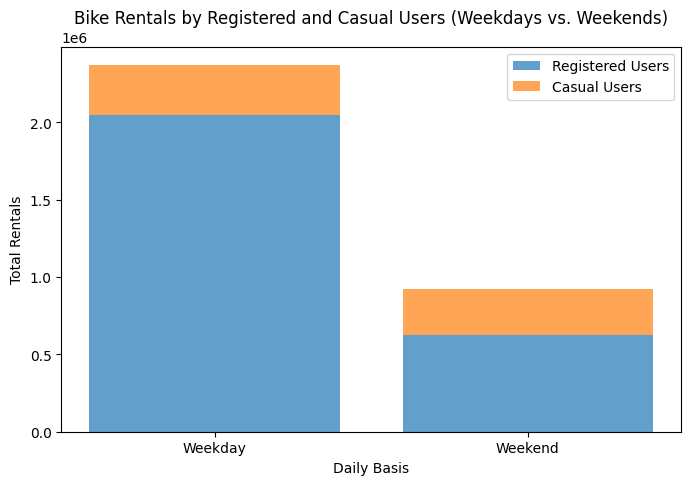

In [99]:
plt.figure(figsize=(8, 5))
plt.bar(day_weekend_weekday_rentals['day_type'], day_weekend_weekday_rentals['registered'], label='Registered Users', alpha=0.7)
plt.bar(day_weekend_weekday_rentals['day_type'], day_weekend_weekday_rentals['casual'], label='Casual Users', alpha=0.7, bottom=day_weekend_weekday_rentals['registered'])
plt.title('Bike Rentals by Registered and Casual Users (Weekdays vs. Weekends)')
plt.xlabel('Daily Basis')
plt.ylabel('Total Rentals')
plt.legend()
plt.show()

In [100]:
df_day['day_type'] = df_day['weekday'].apply(lambda x: 'Weekend' if x in ["Sunday", "Saturday"] else 'Weekday')

recency_df = df_day.groupby(by="day_type", as_index=False).agg({
    "dteday": "max"
})
recency_df['recency_days'] = pd.to_datetime(df_day['dteday'].max()) - pd.to_datetime(recency_df['dteday'])
recency_df['recency_days'] = recency_df['recency_days'].dt.days

frequency_df = df_day.groupby(by="day_type", as_index=False).agg({
    "registered": "count",
    "casual": "count"
})

monetary_df = df_day.groupby(by="day_type", as_index=False).agg({
    "registered": "sum",
    "casual": "sum"
})

df_rfm = pd.merge(recency_df[['day_type', 'recency_days']], frequency_df, on="day_type")
df_rfm = pd.merge(df_rfm, monetary_df, on="day_type")

df_rfm.columns = ['day_type', 'recency_days', 'frequency_registered', 'frequency_casual', 'monetary_registered', 'monetary_casual']

print(df_rfm)

  day_type  recency_days  frequency_registered  frequency_casual  \
0  Weekday             0                   521               521   
1  Weekend             1                   210               210   

   monetary_registered  monetary_casual  
0              2045201           325644  
1               627461           294373  


Based on the RFM analysis of bike rentals between weekdays and weekends, I found distinct patterns in user behavior.
- Recency shows that bike rentals for both registered and casual users occur more recently on weekdays, suggesting that people tend to rent bikes regularly during the workweek.
- Frequency reveals that registered users rent bikes much more often on weekdays, likely due to commuting, while casual users maintain a more balanced frequency between weekdays and weekends, possibly using bikes for leisure.
- Monetary value indicates that weekdays generate the highest total number of rentals, especially from registered users, while casual users contribute more rentals on weekends compared to registered users.

Overall, the analysis suggests that bike-sharing services should allocate more resources during weekdays to accommodate registered commuters, while focusing on leisure-oriented services for casual users on weekends.

## Analisis Lanjutan (Opsional)

## Conclusion

- **Conclusion for Business Question 1 : How do weather conditions affect the total number of bike rentals?**

   Based on the analysis, I found that **weather conditions significantly impact bike rental activity**. When the weather is clear or partly cloudy (weathersit = 1), the total number of rentals is much higher compared to days with worse weather, such as misty, rainy, or snowy conditions (weathersit = 3 or 4). The RFM analysis shows that bike rentals occur more recently, more frequently, and in greater numbers when the weather is favorable. Adverse weather conditions lead to a noticeable drop in bike rentals, indicating that clear and mild weather encourages more biking, while bad weather discourages it. This insight suggests that bike-sharing services can optimize their operations by deploying more bikes on clear days and reducing them during poor weather conditions to align with demand.

- **Conclusion for Business Question 2 : How does the number of bike rentals differ between registered and casual users on weekdays and weekends**

   From the analysis, we observed significant differences between registered and casual users in terms of bike rental behavior across weekdays and weekends. Registered users rent bikes far more frequently during the weekdays, likely for commuting purposes, and their rental numbers drop considerably on weekends. Casual users, on the other hand, have a more balanced rental pattern, with only a slight decrease in rentals on weekends, likely using bikes for leisure activities. The RFM analysis confirms that registered users are heavily reliant on the bike-sharing system for weekday activities, while casual users are more active on weekends. Bike-sharing services can use these insights to manage their resources efficiently, focusing on providing more bikes during weekdays for commuters and catering to leisure needs on weekends for casual users.